<a href="https://colab.research.google.com/github/peterkeep/calculus-labs/blob/master/calculus-2/Lab2_Improper_Integrals_Sequences_and_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab 2: Improper Integrals, Sequences, and Series
==================================

**Name:**

**Due Date:** 

# Instructions

Follow through the Leading Examples section, and then complete the Your Turn section:
- Improper Integrals
- Limits of Sequences
- Series Convergence and Approximation

Your task in this lab is to follow the Leading Examples, and complete the Your Turn sections, where you will write similar code to perform similar functions. There will also be Follow-Up Questions: you can answer these by typing your answers under each question.

Type your name and due date on the top of this lab.

Submit the file on Canvas through the assignment submission for Lab 2.


# Leading Examples



In [ ]:
import numpy as np
from matplotlib import pyplot as plt

## Improper Integrals

In this example, we'll investigate two improper integrals. We have some experience evaluating/approximating definite integrals using Riemann Sums (from Lab 1), so the setup will be familiar, but we'll need to be careful dealing with the different kinds of infinite behavior in these improper integrals.

Let's take a look at an improper integral with infinity in the limits of integration.

### Infinite Width

Let's take a look at this interesting integral:

$$
  \int_0^\infty x^3 e^{-x^2}\;dx
$$

First, we should get a feel for what this function looks like when we graph it. Notice that we can't graph this function from $x=0$ to $x=\infty$, so we'll have to approximate it by just picking a large value for the upper limit of integration. I'll use $b = 10000$ here.

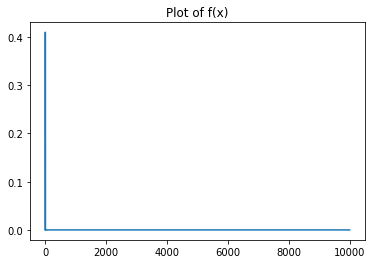

In [ ]:
def f(x):
  return x**3 * np.e**(- x**2)

a = 0
b = 10000
n = 1000000

delta_x = (b - a) / n

xVals = np.arange(a,b, delta_x)

plt.plot(xVals, f(xVals))
plt.title("Plot of f(x)")
plt.show()

Ok....that's not very helpful, right? Notice that it looks like majority of the "stuff" in the graph of the function happens around $x=0$, and after that, the function seems to be essentially 0. So let's take things back a bit, and look at the graph from $x=0$ to $x=20$.

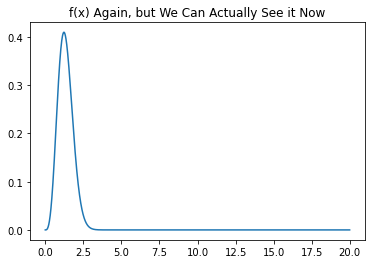

In [ ]:
a = 0
b = 20
n = 2000

delta_x = (b - a) / n

xVals = np.arange(a,b, delta_x)

plt.plot(xVals, f(xVals))
plt.title("f(x) Again, but We Can Actually See it Now")
plt.show()

Alright, so this looks good! We can see that when we integrate, the majority of the "area" actually shows up between $x=0$ and $x=3$ or something close to that. Let's not get too ambitious with cutting off the "tail" of this function when we approximate the integral. There could still be some area under that, especially when we extend out to infinity. So when we actually approximate the integral, we'll send that upper limit of integration back to something large. We won't graph the Riemann Sum, since there won't be much to look at, like our first graph of $f(x)$.

In [ ]:
a = 0
b = 100000
delta_x = 0.01

xPartition = np.arange(a, b, delta_x)

Area = sum(f(xPartition)) * delta_x
print(Area)

0.5000000000833369


We can use Integration by Parts to actually integrate and evaluate $\displaystyle \int_0^\infty x^3 e^{-x^2}\;dx$, and if we did, we'd find that this approximation is VERY close to the actual value. Good news! Let's look at another example.

### Infinite Height

Let's take a look at the following integral:

$$
  \int_1^3 \frac{1}{\sqrt{x-1}}\;dx
$$

Again, let's graph this first. Note that we won't be able to start at $x=1$, since that's the location of the vertical asymptote. Instead, we'll start our partition at $1+\Delta x$, and go all the way up to $x=3$ (by ending our `np.arange()` at `b+delta_x`), so we're using a Right Riemann sum instead.

In [ ]:
def g(x):
  return 1 / np.sqrt(x - 1)

a = 1
b = 3
n = 100000

delta_x = (b-a) / n

xPartition = np.arange(a + delta_x, b + delta_x, delta_x)

Area = sum(g(xPartition)) * delta_x
print(Area)

2.82190329190862


## Sequences

In this example, we'll do some basic numerical approximation of limits of sequences.

Let's consider some sequence:

$$
  \{a_n\} = \left\{\dfrac{(-1)^{n+1}}{n}\right\}_{n=1}^\infty
$$

With sequences, we're commonly interested the limit of the sequence. We might notice that this limit will be a bit tricky to do by hand. We could set up an inequality, and apply the Squeeze Theorem in order to evaluate $\displaystyle \lim_{n\to\infty} \frac{(-1)^{n+1}}{n}$, but there might be an easier way. Let's define a function in python using the explicit formula for $\{a_n\}$.



In [ ]:
def SeqA(n):
  return (-1.0)**(n+1.0)/n

Let's try to get a good visualization of the sequence by plotting it. We'll use the `matplotlib` library like we've done normally, but we'll change things slightly: our default setup was plotting functions as continuous curves, but when we're visualizing sequences we should be thinking of disconnected points, only evaluated at integer inputs.

The way that we'll do this is by adding in a "plotting character" into our code. We'll use the line `plt.plot(xList, yList, 'ro')` below, where `xList` can be replaced with the name of our list of inputs (in this case, our list of indeces) and `yList` can be replaced with the list of sequence terms (using our function `SeqA` defined above). The new addition, `'ro'` has two pieces: a color, and a point style. The color is marked by the first character (in this case, `r` is for red) and the point style is marked by the second character (in this case, 'o' is for a circular point).

**Possible Color Codes:**
- `b`: blue
- `g`: green
- `r`: red
- `c`: cyan
- `m`: magenta
- `y`: yellow
- `k`: black
- `w`: white

**Possible Point Styles:**
- `o`: circle
- `.`: point
- `,`: pixel
- others can be found at https://matplotlib.org/3.2.2/api/markers_api.html



In [ ]:
termsA = np.arange(1,101) #Remember, we have to count a little past the end point
plt.plot(termsA, SeqA(termsA), 'ro')
plt.title("Sequence")
plt.show()

We should notice a couple of things:
1. This point size is pretty big: it's hard to see the detail.
2. We are probably more interested in the "tail" of our sequence...this graph shows us the beginning terms.
3. Even still, it looks like we already have some good evidence of this sequence converging to 0.

Let's make this plot a little more informative: don't get me wrong, it's nice to see the beginning of this sequence, but we'll use this second plot to give us some good detail. We'll change the size of the points, consider only the "tail" (we'll look at terms from $n=500$ to $n=10000$), and even draw a horizontal line at what we guess the limit is.



In [ ]:
tailA = np.arange(500,10000)
plt.plot(tailA, SeqA(tailA), 'r,')
plt.hlines(0, 500, 10000)
plt.title("The Tail of the Sequence")
plt.show()

This gives some very good visual evidence that the sequence $\{a_n\}$ converges to 0.

## Series

Let's consider the same sequence as above, but we'll turn it into an infinite series: we'll add all of the terms together.

$$
\sum_{k=1}^\infty \dfrac{(-1)^{k+1}}{k}
$$

One of the most fundamental results that we have is that
$$
\sum_{k=1}^\infty \dfrac{(-1)^{k+1}}{k} = \lim_{n\to\infty} \sum_{k=1}^n \dfrac{(-1)^{k+1}}{k} = \lim_{n\to\infty} S_n
$$
as long as this limit of the sequence of partial sums, $\{S_n\}$, actually exists.

We can investigate that sequence in the same way as we did above: notice, though, that we need to work on building the sequence of partial sums. We've already noticed in our course that this is rarely easy. Instead of building an explicit formula to define the sequence of partial sums, we can get the terms by simply adding over and over again.

Let's define a function that will do this for us:



In [ ]:
def PartialSum(a, n, seq):
  currentSum = 0
  for k in range(a,n+1):
      currentSum = currentSum + seq(k)
  return currentSum

def SeqPartialSum(a,n,seq):
  currentSum = []
  for k in range(a,n+1):
    currentSum.append(PartialSum(a,k,seq))
  return currentSum

This function will take in 3 values:

- `a` represents the first index in the sum ($k=0$ or $k=1$, etc.)
- `n` represents the largest index for the partial sum ($S_{100}$)
- `seq` represents the sequence of terms, defined as a function in python $\left(a_k = \frac{(-1)^{k+1}}{k}\right)$.

**Note: You can feel free to run this chunk of code, and then use these functions later on: you don't need to re-build them!**

Now let's investigate the partial sum for the series we're looking at!



In [ ]:
# Partial sum of the first 10 terms
print(PartialSum(1,10,SeqA))
# The first 10 terms in the sequence of partial sums
print(SeqPartialSum(1,10,SeqA))

So these two functions will be very helpful: we can see that the `PartialSum()` function gives us the actual sum of the first $n$ terms for some series, and the `SeqPartialSum()` function gives us a list of the first $n$ partial sums. This will be helpful for plotting!

Let's plot the first 50 partial sums!


In [ ]:
indecesA = np.arange(1,51) # Remember, np.arange() doesn't include the last value, so we go "up to" 51 terms.
PartialsA = SeqPartialSum(1,50, SeqA) # This is the list of partial sums we'll plot

plt.plot(indecesA, PartialsA, 'b.')
plt.title("Sequence of Partial Sums")
plt.show()

It looks like we've got some good visual evidence that this series converges: the sequence of partial sums seems to have a nice horizontal asymptote somewhere between 0.55 and 0.60. Just looking at this visual depiction, though, doesn't give us a very detailed idea of *what* the series converges to...something in between 0.55 and 0.6 isn't very helpful.

Let's look at some of the bigger partial sums:


In [ ]:
# Partial sum of the first 50 terms
print(PartialSum(1,50,SeqA))

This is the value of the last partial sum that we plotted above. Already, this is more detail than the graph gave us.

Let's try looking at some more partial sums to get a really good approximation of the series:


In [ ]:
# Partial sum of the first 10000 terms
print(PartialSum(1,10000,SeqA))

# Partial sum of the first 50000 terms
print(PartialSum(1,50000,SeqA))

# Partial sum of the first 100000 terms
print(PartialSum(1,100000,SeqA))

# Partial sum of the first 5000000 terms
print(PartialSum(1,5000000,SeqA))

Wow, this is incredible! We have at out fingertips the first **five million** terms of this series added up!

Now, this is a series that we actually know a lot about: we have seen in this class that $\displaystyle \sum_{k=1}^\infty \dfrac{(-1)^{k+1}}{k} = \ln 2$.

Let's check how good our approximation is!



In [ ]:
Approx = PartialSum(1,5000000,SeqA)
Actual = np.log(2)
PercError = abs(Actual - Approx)/Actual
print("Approximation:", Approx)
print("Actual:", Actual)
print("Percenrage Error:", PercError)

This percentage error says that our approximation is "off" by approximately 0.00001443%. We can also see that our approximation is accurate up to 5 decimal points. Pretty good!

# Your Turn

Let's start off with a short improper integral problem.

## Improper Integrals

Consider the integral: 
$$
\int_{-1}^1 \frac{1}{x}\;dx
$$

Let's approximate this improper integral using a Riemann Sum. We'll need to be careful, since $x=0$ is a vertical asymptote, so we can't have our function defined there. So let's use a Midpoint Approximation.

Once you set up your values for `a` and `b` (the limits of integration) and `delta_x`, you can use `xMidPartition = np.arange(a + delta_x / 2, b, delta_x)`.

In [ ]:
# Use this chunk to approximate the improper integral.


### Follow-Up Questions

*Include your answers underneath each question.*

--------

1. *What is your approximation? What is the **actual** value of the integral (do it by hand to check)? Explain any weirdness you find.*


---------

## Limits of Sequences

We'll re-create the Leading Example, but with a sequence and series that are a little less familiar.

Let's consider the sequence $\{b_n\} = \left\{ \dfrac{n\sin(n)}{n^2+1} \right\}_{n=1}^\infty$

We'll be interested in the limit of the sequence, again. We could set up the Squeeze Theorem inequality, but that might be annoying. Let's just approximate it graphically.

First, we'll define a function, the explicit formula for $\{b_n\}$.



In [ ]:
# Use this chunk to define the function for the terms of the sequence.

Now we'll plot the first 100 terms:



In [ ]:
# Use this chunk to plot the first 100 terms of the sequence.

And now we can plot the "tail" of our sequence. Include a horizontal line to represent your approximation of the limit of this sequence.



In [ ]:
# Use this chunk of code to plot the tail of the sequence.


### Follow-Up Questions

*Include your answers underneath each question.*

--------

2. *Is your approximation of the limit of this sequence useful information for our end goal: talking about the infinite series?*


---------

## Series Convergence and Approximation

We'll investigate the series:

$$
  \sum_{k=1}^\infty \dfrac{k \sin(k)}{k^2+1}
$$

First, notice that it is difficult to see if this series converges or not. This is not technically an alternating series, since, while the $\sin(k)$ will be bounded between -1 and 1, it doesn't alternate back and forth term by term.

Setting up our series convergence tests is not easy in this case. So let's investigate the partial sums, as we did above.

As a reminder, we can use the `PartialSum()` and `SeqPartialSum()` functions from above: we just need to make sure we run that block of code to define the functions.

Let's plot the first 100 partial sums.



In [ ]:
# Use this chunk to plot the first 100 partial sums


Let's get some bigger partial sums. This should give us an idea of what's going on.



In [ ]:
# Partial sum of the first 10000 terms

# Partial sum of the first 50000 terms

# Partial sum of the first 100000 terms

# Partial sum of the first 5000000 terms

### Follow-Up Questions

*Include your answers underneath each question.*

--------

3. *Do you think this series converges or diverges? If it converges, what do you think it converges to? Is this approximation good?*


4. *I claim that it's hard to set up some convergence tests. Pick one that seems reasonable, and explain why this series is hard to deal with in that test specifically.*


---------